In [1]:
%reload_ext autoreload
%autoreload 2
import os, sys
if 'notebook_path' not in vars():
    notebook_path = os.getcwd()
os.chdir(os.path.join(notebook_path,".."))
sys.path.append(os.getcwd())

import torch
from torch.utils.data import Dataset, DataLoader
import scipy.io.wavfile as wav
import pandas as pd
import matplotlib.pyplot as plt
import torchaudio
import glob
import math
import torch.nn as nn
import numpy as np
from bisect import bisect_left
import scipy as sp
import h5py
from scipy.io import wavfile
from glob import glob
import importlib
import json

In [2]:
from src.data_modules import MovingImpulseResponseDataModule
from src.cnn_model_v2 import cnn_model_v2
#import src.data_augmentations as data_augmentations
#from torchvision import transforms

sound_dir = "./data/reference_data/reference_sounds/"
#transform = transforms.Compose([data_augmentations.doppler_aug(max_rel_v=3), data_augmentations.noise_aug(noise_ratio=0.01)])
#data_module = MovingImpulseResponseDataModule("data/datasets/moving_dataset_directivity_medium_extra_val.hdf5",sound_dir,batch_size=20, n_mics_per_batch=11)
data_module = MovingImpulseResponseDataModule("data/datasets/moving_dataset_directivity_medium.hdf5",sound_dir,batch_size=20, n_mics_per_batch=11)
data_module.setup(stage="test")

model = cnn_model_v2.load_from_checkpoint("checkpoints/epoch=2949-step=23600.ckpt", map_location=torch.device("cpu"), scale_model_width=2, n_blocks=4, block_width=2000)
model.eval();

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
data_module = MovingImpulseResponseDataModule("data/datasets/moving_dataset_directivity_medium_extra_val2.hdf5",sound_dir,batch_size=20, n_mics_per_batch=11)
data_module.setup()
len(data_module.dataset_train)

122

In [4]:
X,y = next(iter(data_module.test_dataloader()))

In [5]:
#idx = np.arange(0,10)
pred = model(X)
loss_fn = nn.CrossEntropyLoss()

loss_fn(pred,y)
i = 2
#plt.plot(pred[i].detach().softmax(dim=0))
#plt.xlim(200,300)
for i in range(X.shape[0]):
    print(f'gt = {y[i] - pred[i].argmax():.0f}')


gt = -8
gt = -1
gt = 4
gt = -7
gt = -2
gt = -7
gt = 1
gt = 5
gt = -3
gt = -13
gt = 10
gt = 10
gt = -6
gt = 4
gt = -11
gt = -6
gt = 0
gt = -3
gt = 3
gt = -1
gt = -9
gt = 5
gt = 1
gt = 0
gt = -5
gt = -10
gt = 4
gt = -10
gt = 4
gt = 0
gt = -1
gt = -12
gt = 27
gt = 0
gt = -6
gt = 4
gt = 4
gt = -1
gt = 3
gt = -6
gt = -1
gt = -6
gt = -14
gt = 3
gt = 5
gt = -4
gt = -5
gt = 0
gt = 8
gt = 0
gt = 4
gt = 4
gt = 3
gt = -16
gt = 16
gt = 0
gt = 7
gt = -7
gt = 10
gt = 0
gt = 4
gt = -2
gt = 6
gt = -8
gt = -11
gt = 8
gt = 19
gt = 0
gt = -18
gt = -7
gt = 3
gt = 6
gt = 5
gt = 2
gt = -1
gt = -33
gt = 0
gt = -7
gt = 16
gt = -5
gt = 6
gt = -7
gt = 9
gt = 11
gt = 6
gt = -4
gt = -11
gt = 5
gt = -4
gt = 3
gt = -4
gt = 0
gt = -6
gt = 1
gt = 3
gt = 6
gt = -4
gt = -21
gt = -3
gt = -7
gt = 7
gt = -10
gt = 21
gt = -11
gt = 1
gt = 1
gt = 25
gt = -18
gt = 17
gt = 6
gt = 1
gt = -15
gt = 19
gt = 4
gt = -5
gt = -4
gt = 12
gt = -7
gt = 18
gt = 0
gt = 0
gt = -4
gt = -11
gt = 8
gt = 14
gt = -2
gt = -2
gt = 4
gt = 18
gt = 0

In [6]:
pred = model(X)
loss_fn = nn.CrossEntropyLoss()

loss_fn(pred,y)

tensor(7.2835, grad_fn=<NllLossBackward0>)

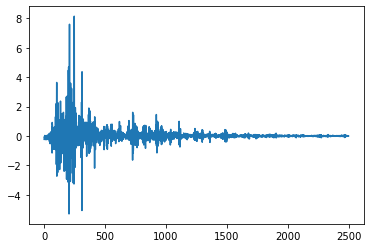

In [5]:
x = X/X.std(dim=(1,2),keepdim=True)
plt.plot(x[800,0])